In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def rename_cols_and_save(xls_name):
    df = pd.read_excel("../../data/{0}.xls".format(xls_name), index_col=None, header=None)
    if xls_name == 'hprice1':
        names_dict = {0:'price', 
                     1:'assess', 
                     2:'bdrms',
                     3:'lotsize', 
                     4:'sqrft', 
                     5:'colonial',
                     6:'lprice', 
                     7:'lassess', 
                     8:'llotsize',
                     9:'lsqrft', 
                    }
    elif xls_name == 'saving':
         names_dict = {0:'sav', 
                     1:'inc', 
                     2:'size',
                     3:'edu', 
                     4:'age', 
                     5:'black',
                     6:'cons', 
                      }
        
    df.rename(columns = names_dict, inplace = True)
    df.to_csv("../../data/{0}.csv".format(xls_name), index=False)
    return df

df = rename_cols_and_save(xls_name='hprice1')

df.colonial = df.colonial.astype('category')


In [23]:
class EDA(object):
    
    def __init__(self, df, y):
        self.df = df
        self.y_string = y
        self.y = df[y]
        return None
    
    
    def inspect(self):
        inspect = {}
        inspect['head'] = self.df.head()
        inspect['describe'] = self.df.describe().T
        inspect['dtypes'] = self.df.dtypes
        return inspect
        
        return inspect 
    
    def _dist_plot(self, df, var):
        plt.figure()
        sns_plot = sns.distplot(df[var], color='b').get_figure()
        sns_plot.savefig("dist_plot_{0}.png".format(var))
        return sns_plot
    
    
    def variation(self):
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns: 
            self._dist_plot(df=numerical, var=col)   
        return None
    
    
    def _scatter_matrix(self):
        numerical = self.df.select_dtypes(include=np.number)
        plt.figure()
        sns_plot = sns.pairplot(numerical)
        sns_plot.savefig("scatter_matrix_plot.png".format())
        return None
    
    def _box_plot(self, var_x):
        plt.figure()
        sns_plot = sns.boxplot(x=var_x, y=self.y, data=self.df).get_figure()
        sns_plot.savefig("box_plot_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def _scatter_plot(self, var_x):
        sns_plot = sns.lmplot(x=var_x, y=self.y_string, data=self.df)
        sns_plot.savefig("correlation_{0}_{1}.png".format(var_x, self.y_string))
        return None
    
    def covariation(self):
        self._scatter_matrix()
        
        categorical = self.df.select_dtypes(include=['bool', 'category']) 
        for col in categorical.columns:
            self._box_plot(var_x = col)
         
        numerical = self.df.select_dtypes(include=np.number)
        for col in numerical.columns:
            self._scatter_plot(var_x=col)
        return None
    
    def run(self):
        self.variation()
        self.covariation()
        return None
    
    pass

In [24]:
eda = EDA(df=df, y='price')

In [25]:
eda.inspect()

{'head':    price  assess  bdrms  lotsize  sqrft colonial    lprice   lassess  \
 0  300.0   349.1      4     6126   2438        1  5.703783  5.855359   
 1  370.0   351.5      3     9903   2076        1  5.913503  5.862210   
 2  191.0   217.7      3     5200   1374        0  5.252274  5.383118   
 3  195.0   231.8      3     4600   1448        1  5.273000  5.445875   
 4  373.0   319.1      4     6095   2514        1  5.921578  5.765504   
 
    llotsize    lsqrft  
 0  8.720297  7.798934  
 1  9.200593  7.638198  
 2  8.556414  7.225482  
 3  8.433811  7.277938  
 4  8.715224  7.829630  ,
 'describe':           count         mean           std          min          25%  \
 price      88.0   293.546034    102.713445   111.000000   230.000000   
 assess     88.0   315.736364     95.314437   198.700000   253.900000   
 bdrms      88.0     3.568182      0.841393     2.000000     3.000000   
 lotsize    88.0  9019.863636  10174.150414  1000.000000  5732.750000   
 sqrft      88.0  2013.6

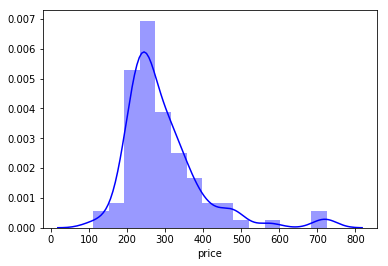

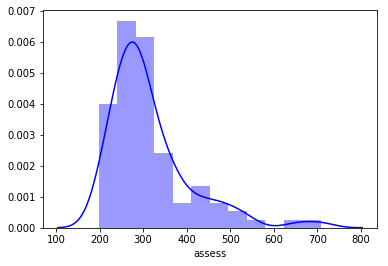

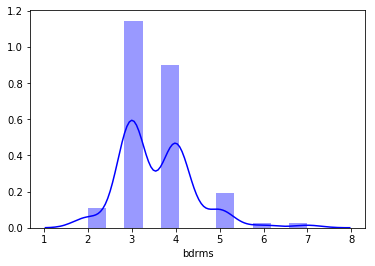

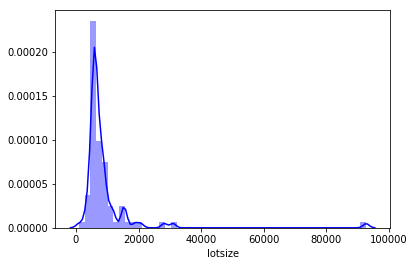

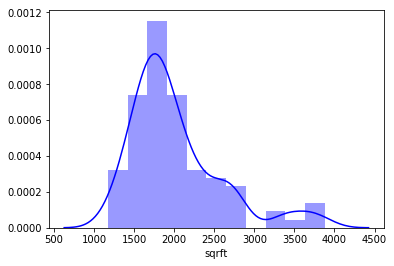

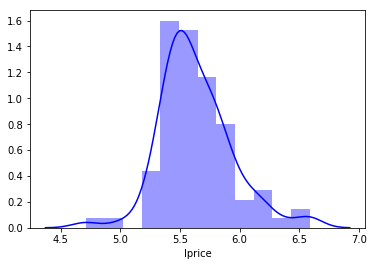

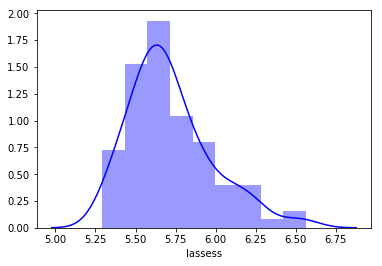

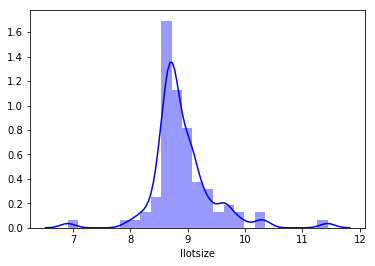

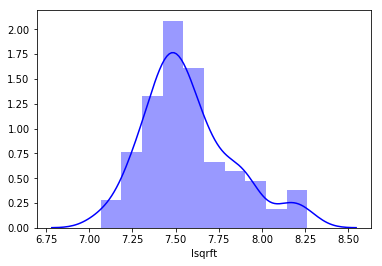

<Figure size 432x288 with 0 Axes>

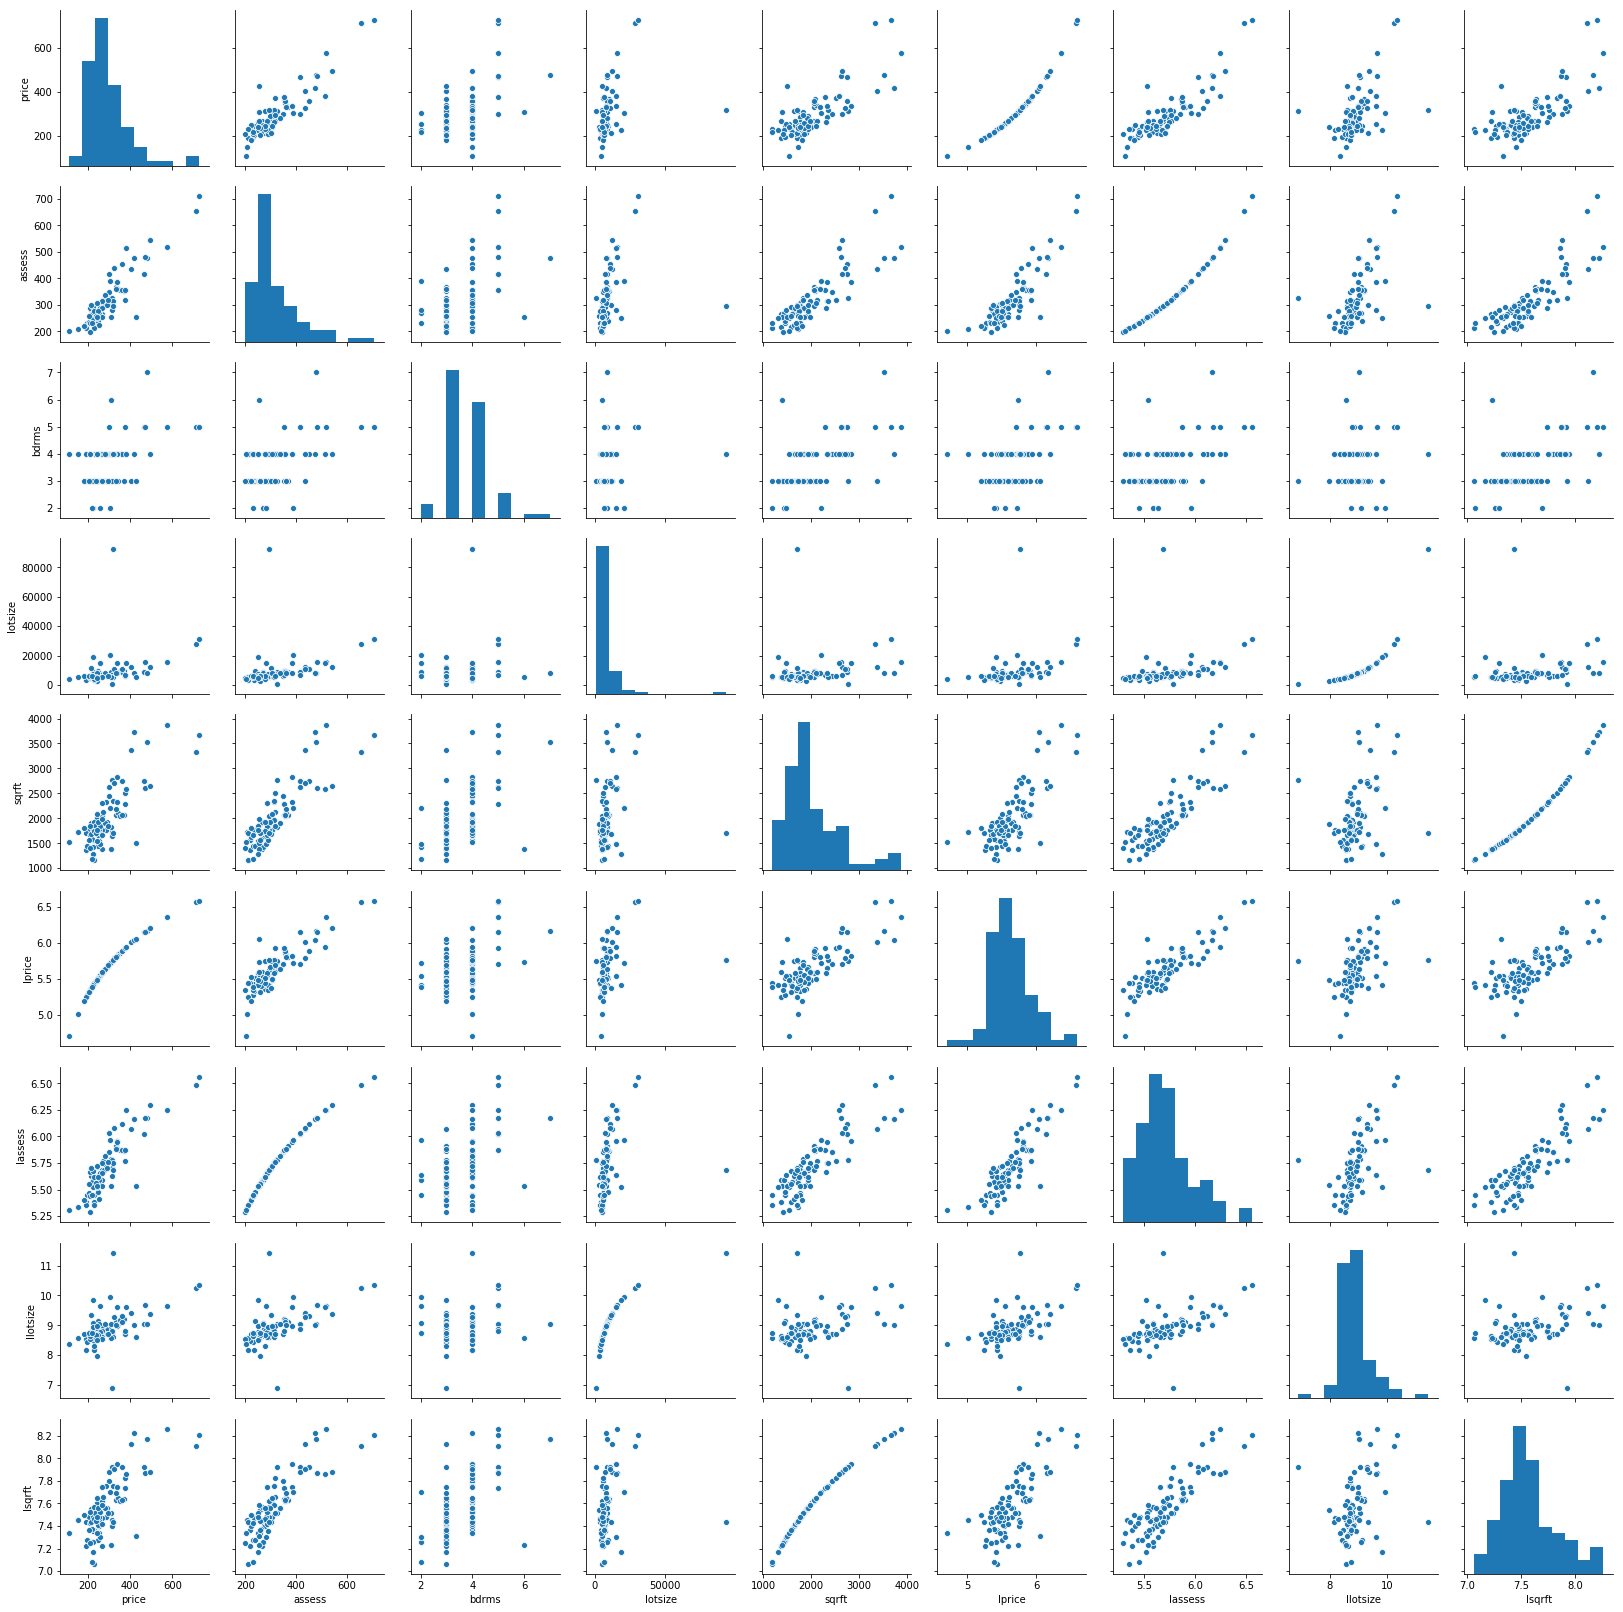

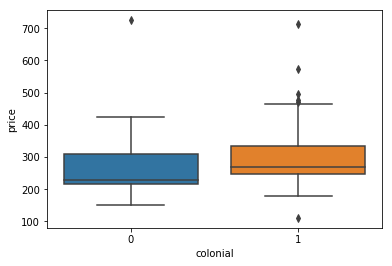

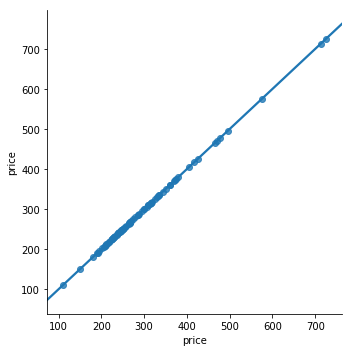

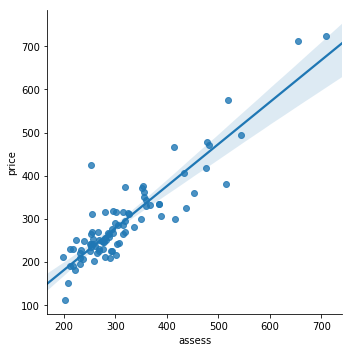

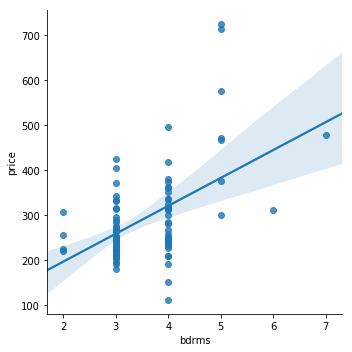

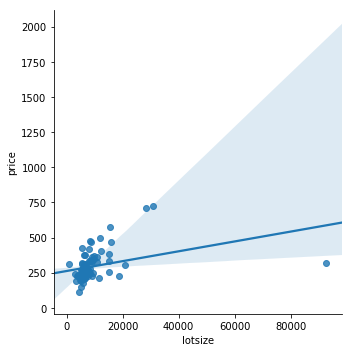

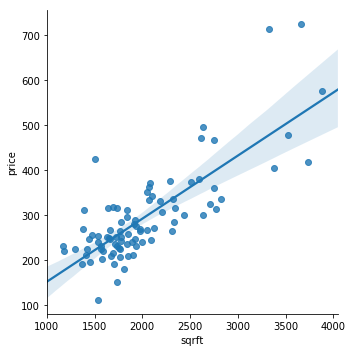

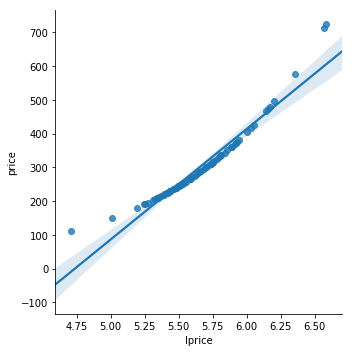

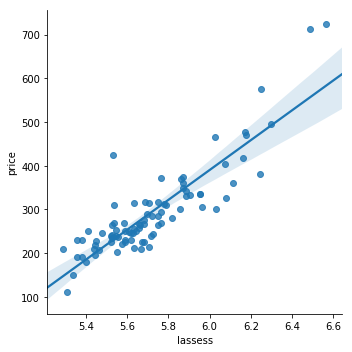

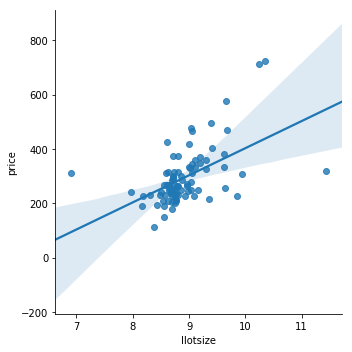

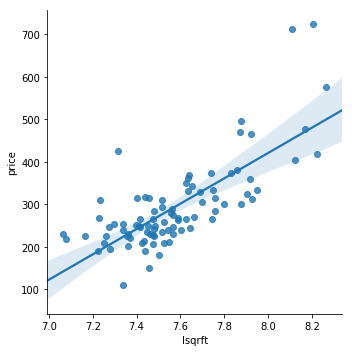

In [18]:
eda.run()